In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
import copy

import sys
sys.path.append("lib")

import lib

import torch
torch.set_default_dtype(torch.float64)

from functorch import vmap
from torch.utils.data import DataLoader
import tqdm

/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda")

In [3]:
coords_x, coords_y, _ = lib.utils.read_coords("2d_burger_data/time_step_0.csv")
coords = torch.stack((coords_x, coords_y), dim=1)

In [4]:
# dt = 0.004
# num_steps = 501
dt = 0.002
num_steps = 1001
num_nodes = coords_x.shape[0]

datas = lib.utils.read_data(num_steps, num_nodes, '2d_burger_data/time_step_', 'vel_0')
datas.shape

torch.Size([1001, 14641])

In [5]:
u_dot = lib.utils.u_dot(datas, dt)

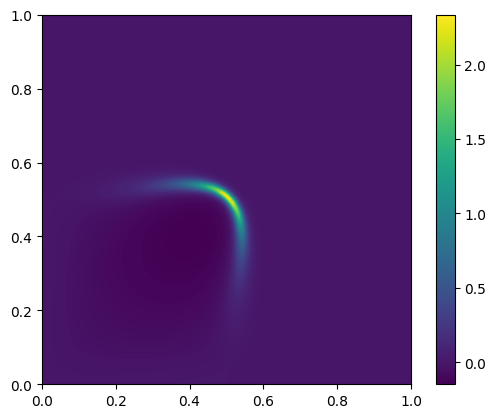

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = coords_x.tolist()
y = coords_y.tolist()
z = u_dot[455].tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()

In [7]:
datas = torch.hstack((datas[:-1], u_dot))
datas.shape

torch.Size([1000, 29282])

In [8]:
N = datas.shape[1] // 2
n = 20

In [9]:
datas = datas.to(device)
batch_size = 20
train_data = DataLoader(datas, batch_size=batch_size, shuffle=True)

In [10]:
ed = lib.nrbs_no_convolve.EncoderDecoder(N=N, n=n, device=device)

In [11]:
ed.nrbs = torch.load('models/nrbs_n_m_test.pth')

In [12]:
ed.train(train_data_loader=train_data, epochs=1000)

100%|██████████| 50/50 [00:00<00:00, 54.76it/s]


Itr 0, loss = 1.185690540455509


100%|██████████| 50/50 [00:00<00:00, 54.54it/s]


Itr 1, loss = 1.184989658541464


100%|██████████| 50/50 [00:00<00:00, 54.66it/s]


Itr 2, loss = 1.1846289007626294


100%|██████████| 50/50 [00:00<00:00, 54.50it/s]


Itr 3, loss = 1.1838584703491222


100%|██████████| 50/50 [00:00<00:00, 54.57it/s]


Itr 4, loss = 1.1835012470789634


100%|██████████| 50/50 [00:00<00:00, 54.50it/s]


Itr 5, loss = 1.1827481666773854


100%|██████████| 50/50 [00:00<00:00, 54.71it/s]


Itr 6, loss = 1.1817705430276668


100%|██████████| 50/50 [00:00<00:00, 54.15it/s]


Itr 7, loss = 1.1811693281079154


100%|██████████| 50/50 [00:00<00:00, 54.25it/s]


Itr 8, loss = 1.1808219372804558


100%|██████████| 50/50 [00:00<00:00, 54.39it/s]


Itr 9, loss = 1.1800602414293482


100%|██████████| 50/50 [00:00<00:00, 54.76it/s]


Itr 10, loss = 1.1793954568796952


100%|██████████| 50/50 [00:00<00:00, 54.77it/s]


Itr 11, loss = 1.1790043129772025


100%|██████████| 50/50 [00:00<00:00, 54.51it/s]


Itr 12, loss = 1.17862780801941


100%|██████████| 50/50 [00:00<00:00, 54.55it/s]


Itr 13, loss = 1.1780943865680729


100%|██████████| 50/50 [00:00<00:00, 54.41it/s]


Itr 14, loss = 1.177197923800948


100%|██████████| 50/50 [00:00<00:00, 54.52it/s]


Itr 15, loss = 1.1770084099821112


100%|██████████| 50/50 [00:00<00:00, 54.52it/s]


Itr 16, loss = 1.1761664221880233


100%|██████████| 50/50 [00:00<00:00, 54.42it/s]


Itr 17, loss = 1.1752443737902363


100%|██████████| 50/50 [00:00<00:00, 54.47it/s]


Itr 18, loss = 1.1748236657212057


100%|██████████| 50/50 [00:00<00:00, 54.46it/s]


Itr 19, loss = 1.1751112998654147


100%|██████████| 50/50 [00:00<00:00, 54.43it/s]


Itr 20, loss = 1.174074718618468


100%|██████████| 50/50 [00:00<00:00, 54.49it/s]


Itr 21, loss = 1.1742752884664143


100%|██████████| 50/50 [00:00<00:00, 53.98it/s]


Itr 22, loss = 1.1728748025315523


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 23, loss = 1.172244243043892


100%|██████████| 50/50 [00:00<00:00, 53.69it/s]


Itr 24, loss = 1.172038519003179


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 25, loss = 1.171183465574435


100%|██████████| 50/50 [00:00<00:00, 54.05it/s]


Itr 26, loss = 1.1704733552227475


100%|██████████| 50/50 [00:00<00:00, 53.99it/s]


Itr 27, loss = 1.170689937021117


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 28, loss = 1.1700966504919958


100%|██████████| 50/50 [00:00<00:00, 53.87it/s]


Itr 29, loss = 1.1695395425969164


100%|██████████| 50/50 [00:00<00:00, 54.07it/s]


Itr 30, loss = 1.1683394031806698


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 31, loss = 1.168205614343494


100%|██████████| 50/50 [00:00<00:00, 53.99it/s]


Itr 32, loss = 1.1676471720214971


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 33, loss = 1.1678421310953144


100%|██████████| 50/50 [00:00<00:00, 53.97it/s]


Itr 34, loss = 1.1664640152122507


100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Itr 35, loss = 1.1657056359386984


100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Itr 36, loss = 1.165324475028404


100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Itr 37, loss = 1.164794419423599


100%|██████████| 50/50 [00:00<00:00, 53.92it/s]


Itr 38, loss = 1.1644427633367038


100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Itr 39, loss = 1.1637219946527873


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 40, loss = 1.1632787427033806


100%|██████████| 50/50 [00:00<00:00, 54.02it/s]


Itr 41, loss = 1.1628500364834746


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 42, loss = 1.1622156780401458


100%|██████████| 50/50 [00:00<00:00, 54.01it/s]


Itr 43, loss = 1.1624156816686657


100%|██████████| 50/50 [00:00<00:00, 53.54it/s]


Itr 44, loss = 1.161366629978803


100%|██████████| 50/50 [00:00<00:00, 53.48it/s]


Itr 45, loss = 1.1610255075060045


100%|██████████| 50/50 [00:00<00:00, 53.67it/s]


Itr 46, loss = 1.1603831275176817


100%|██████████| 50/50 [00:00<00:00, 53.63it/s]


Itr 47, loss = 1.1598401671508247


100%|██████████| 50/50 [00:00<00:00, 53.65it/s]


Itr 48, loss = 1.1594135254874836


100%|██████████| 50/50 [00:00<00:00, 53.71it/s]


Itr 49, loss = 1.1589674984339948


100%|██████████| 50/50 [00:00<00:00, 53.64it/s]


Itr 50, loss = 1.1582534488259337


100%|██████████| 50/50 [00:00<00:00, 53.58it/s]


Itr 51, loss = 1.158075081870454


100%|██████████| 50/50 [00:00<00:00, 53.74it/s]


Itr 52, loss = 1.1572389591556937


100%|██████████| 50/50 [00:00<00:00, 53.68it/s]


Itr 53, loss = 1.1574290856821028


100%|██████████| 50/50 [00:00<00:00, 53.67it/s]


Itr 54, loss = 1.1573200119608826


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 55, loss = 1.1558994757708245


100%|██████████| 50/50 [00:00<00:00, 53.65it/s]


Itr 56, loss = 1.1555557335681432


100%|██████████| 50/50 [00:00<00:00, 53.47it/s]


Itr 57, loss = 1.1550928640597644


100%|██████████| 50/50 [00:00<00:00, 53.54it/s]


Itr 58, loss = 1.1545427706644962


100%|██████████| 50/50 [00:00<00:00, 53.55it/s]


Itr 59, loss = 1.1540275720790703


100%|██████████| 50/50 [00:00<00:00, 53.59it/s]


Itr 60, loss = 1.1538359468118966


100%|██████████| 50/50 [00:00<00:00, 53.55it/s]


Itr 61, loss = 1.1537958468022655


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 62, loss = 1.152746843450665


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 63, loss = 1.152220922187983


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 64, loss = 1.1517862903590974


100%|██████████| 50/50 [00:00<00:00, 53.06it/s]


Itr 65, loss = 1.1513256113705357


100%|██████████| 50/50 [00:00<00:00, 53.06it/s]


Itr 66, loss = 1.1509529392497784


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 67, loss = 1.1506738248722816


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 68, loss = 1.1501799628356253


100%|██████████| 50/50 [00:00<00:00, 53.08it/s]


Itr 69, loss = 1.1495099724027065


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 70, loss = 1.1491678875495126


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 71, loss = 1.149171104170078


100%|██████████| 50/50 [00:00<00:00, 53.29it/s]


Itr 72, loss = 1.1490896467303566


100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Itr 73, loss = 1.1477877993607803


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 74, loss = 1.1476778854084462


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 75, loss = 1.1472553934924459


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 76, loss = 1.1464240414054274


100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Itr 77, loss = 1.1460041471902154


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 78, loss = 1.1453850545087425


100%|██████████| 50/50 [00:00<00:00, 53.69it/s]


Itr 79, loss = 1.1451051822368405


100%|██████████| 50/50 [00:00<00:00, 53.36it/s]


Itr 80, loss = 1.1452752700787558


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 81, loss = 1.1446584278977556


100%|██████████| 50/50 [00:00<00:00, 51.76it/s]


Itr 82, loss = 1.144291100546772


100%|██████████| 50/50 [00:00<00:00, 52.86it/s]


Itr 83, loss = 1.1434296476792667


100%|██████████| 50/50 [00:00<00:00, 52.90it/s]


Itr 84, loss = 1.1435116939554808


100%|██████████| 50/50 [00:00<00:00, 52.80it/s]


Itr 85, loss = 1.1428373453280494


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 86, loss = 1.142161171231985


100%|██████████| 50/50 [00:00<00:00, 52.23it/s]


Itr 87, loss = 1.1420763982630984


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 88, loss = 1.1412441711195047


100%|██████████| 50/50 [00:00<00:00, 52.29it/s]


Itr 89, loss = 1.1408389815041917


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 90, loss = 1.141580007197032


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 91, loss = 1.1397666180118715


100%|██████████| 50/50 [00:00<00:00, 52.06it/s]


Itr 92, loss = 1.139917181577714


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Itr 93, loss = 1.1390599456659412


100%|██████████| 50/50 [00:00<00:00, 51.56it/s]


Itr 94, loss = 1.138792387236383


100%|██████████| 50/50 [00:00<00:00, 51.57it/s]


Itr 95, loss = 1.1383500000656845


100%|██████████| 50/50 [00:00<00:00, 53.07it/s]


Itr 96, loss = 1.1380722587369965


100%|██████████| 50/50 [00:00<00:00, 50.61it/s]


Itr 97, loss = 1.1373167593713054


100%|██████████| 50/50 [00:00<00:00, 51.45it/s]


Itr 98, loss = 1.1368141779159497


100%|██████████| 50/50 [00:00<00:00, 51.99it/s]


Itr 99, loss = 1.136342795789928


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 100, loss = 1.1368795709124866


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 101, loss = 1.135932633598464


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 102, loss = 1.1357054170121619


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 103, loss = 1.1345672179703286


100%|██████████| 50/50 [00:00<00:00, 52.35it/s]


Itr 104, loss = 1.134534222177171


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 105, loss = 1.133958682739995


100%|██████████| 50/50 [00:00<00:00, 52.90it/s]


Itr 106, loss = 1.1341689417781577


100%|██████████| 50/50 [00:00<00:00, 50.49it/s]


Itr 107, loss = 1.1331211353318706


100%|██████████| 50/50 [00:00<00:00, 51.66it/s]


Itr 108, loss = 1.1325545735288491


100%|██████████| 50/50 [00:00<00:00, 51.87it/s]


Itr 109, loss = 1.1324690776253845


100%|██████████| 50/50 [00:00<00:00, 51.82it/s]


Itr 110, loss = 1.131662035663852


100%|██████████| 50/50 [00:00<00:00, 52.32it/s]


Itr 111, loss = 1.132010293431482


100%|██████████| 50/50 [00:00<00:00, 52.07it/s]


Itr 112, loss = 1.1309119129701735


100%|██████████| 50/50 [00:00<00:00, 52.35it/s]


Itr 113, loss = 1.1305318494555123


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 114, loss = 1.130216959757261


100%|██████████| 50/50 [00:00<00:00, 52.92it/s]


Itr 115, loss = 1.1299030526593883


100%|██████████| 50/50 [00:00<00:00, 52.85it/s]


Itr 116, loss = 1.1296618134062324


100%|██████████| 50/50 [00:00<00:00, 53.42it/s]


Itr 117, loss = 1.1286692542258256


100%|██████████| 50/50 [00:00<00:00, 52.53it/s]


Itr 118, loss = 1.1286484572200735


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 119, loss = 1.1281934492343804


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 120, loss = 1.1277087734149707


100%|██████████| 50/50 [00:00<00:00, 53.52it/s]


Itr 121, loss = 1.1272134132361786


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 122, loss = 1.1268105984979642


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 123, loss = 1.1263756025812033


100%|██████████| 50/50 [00:00<00:00, 52.95it/s]


Itr 124, loss = 1.125889385316845


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 125, loss = 1.125608489747773


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 126, loss = 1.1252184995946162


100%|██████████| 50/50 [00:00<00:00, 52.42it/s]


Itr 127, loss = 1.124873379668918


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 128, loss = 1.1244075862715737


100%|██████████| 50/50 [00:00<00:00, 53.34it/s]


Itr 129, loss = 1.1240303815506791


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 130, loss = 1.1233942019655145


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 131, loss = 1.123029629002039


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 132, loss = 1.1228800285781213


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 133, loss = 1.1227072669094502


100%|██████████| 50/50 [00:00<00:00, 52.03it/s]


Itr 134, loss = 1.1223548218827566


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 135, loss = 1.121732373798968


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 136, loss = 1.1211294800924092


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 137, loss = 1.120973271818451


100%|██████████| 50/50 [00:00<00:00, 53.38it/s]


Itr 138, loss = 1.120167580081807


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 139, loss = 1.119479420819906


100%|██████████| 50/50 [00:00<00:00, 53.46it/s]


Itr 140, loss = 1.119210212999187


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 141, loss = 1.1194178479328902


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 142, loss = 1.118225086595335


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 143, loss = 1.1178009856842746


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 144, loss = 1.117260906090821


100%|██████████| 50/50 [00:00<00:00, 52.91it/s]


Itr 145, loss = 1.1173733623973672


100%|██████████| 50/50 [00:00<00:00, 52.91it/s]


Itr 146, loss = 1.1164892791811607


100%|██████████| 50/50 [00:00<00:00, 52.93it/s]


Itr 147, loss = 1.116339398146818


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 148, loss = 1.1159914819093153


100%|██████████| 50/50 [00:00<00:00, 53.43it/s]


Itr 149, loss = 1.1152200915648691


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 150, loss = 1.1152969760070925


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 151, loss = 1.114286651361634


100%|██████████| 50/50 [00:00<00:00, 52.20it/s]


Itr 152, loss = 1.114690669123463


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 153, loss = 1.1135713043757611


100%|██████████| 50/50 [00:00<00:00, 52.90it/s]


Itr 154, loss = 1.113131730430748


100%|██████████| 50/50 [00:00<00:00, 52.29it/s]


Itr 155, loss = 1.1134287764225133


100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Itr 156, loss = 1.1120962717852751


100%|██████████| 50/50 [00:00<00:00, 52.50it/s]


Itr 157, loss = 1.1117672088992925


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 158, loss = 1.1111923727899866


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 159, loss = 1.1109528558832573


100%|██████████| 50/50 [00:00<00:00, 51.36it/s]


Itr 160, loss = 1.1110009298871677


100%|██████████| 50/50 [00:00<00:00, 52.53it/s]


Itr 161, loss = 1.1101853385188676


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 162, loss = 1.1098272440409505


100%|██████████| 50/50 [00:00<00:00, 52.07it/s]


Itr 163, loss = 1.109550207350935


100%|██████████| 50/50 [00:00<00:00, 51.56it/s]


Itr 164, loss = 1.108728589731317


100%|██████████| 50/50 [00:00<00:00, 53.02it/s]


Itr 165, loss = 1.1083246213110396


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 166, loss = 1.107919161373149


100%|██████████| 50/50 [00:00<00:00, 52.81it/s]


Itr 167, loss = 1.1079462830284594


100%|██████████| 50/50 [00:00<00:00, 52.12it/s]


Itr 168, loss = 1.1071365152154036


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 169, loss = 1.106966499782415


100%|██████████| 50/50 [00:00<00:00, 52.60it/s]


Itr 170, loss = 1.1063798850945508


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 171, loss = 1.1067414316662778


100%|██████████| 50/50 [00:01<00:00, 49.99it/s]


Itr 172, loss = 1.1056756167594144


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 173, loss = 1.1055634797044327


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 174, loss = 1.104911629763178


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 175, loss = 1.104273774808365


100%|██████████| 50/50 [00:00<00:00, 53.08it/s]


Itr 176, loss = 1.1040007572375194


100%|██████████| 50/50 [00:00<00:00, 52.01it/s]


Itr 177, loss = 1.1030497489982978


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 178, loss = 1.1027575994772203


100%|██████████| 50/50 [00:00<00:00, 51.79it/s]


Itr 179, loss = 1.1023087046074858


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 180, loss = 1.101964567596443


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 181, loss = 1.1018006208285185


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 182, loss = 1.1010894074447792


100%|██████████| 50/50 [00:00<00:00, 51.69it/s]


Itr 183, loss = 1.1006319709963706


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 184, loss = 1.100957801316106


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 185, loss = 1.0997289439754998


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 186, loss = 1.099104330664824


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 187, loss = 1.0986843603206233


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 188, loss = 1.0986027507225142


100%|██████████| 50/50 [00:00<00:00, 52.62it/s]


Itr 189, loss = 1.098141698377695


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 190, loss = 1.097293959812286


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 191, loss = 1.0976101156529554


100%|██████████| 50/50 [00:00<00:00, 52.59it/s]


Itr 192, loss = 1.0966560531679859


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 193, loss = 1.0962870210930982


100%|██████████| 50/50 [00:00<00:00, 53.40it/s]


Itr 194, loss = 1.0954330860238795


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 195, loss = 1.0958281287714424


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 196, loss = 1.0948891837243664


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 197, loss = 1.0944574914850693


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 198, loss = 1.0951279382219765


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 199, loss = 1.0937526351221816


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 200, loss = 1.0933403082390782


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 201, loss = 1.0925406345874458


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 202, loss = 1.0921121829095861


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 203, loss = 1.091657872378702


100%|██████████| 50/50 [00:00<00:00, 53.45it/s]


Itr 204, loss = 1.0915153991017272


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 205, loss = 1.090501337525958


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 206, loss = 1.090231206778344


100%|██████████| 50/50 [00:00<00:00, 52.78it/s]


Itr 207, loss = 1.0896882636256355


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 208, loss = 1.0893051891093102


100%|██████████| 50/50 [00:00<00:00, 53.37it/s]


Itr 209, loss = 1.088837986020808


100%|██████████| 50/50 [00:00<00:00, 52.53it/s]


Itr 210, loss = 1.0881998949295186


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 211, loss = 1.0877306126957758


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 212, loss = 1.0879486211376754


100%|██████████| 50/50 [00:01<00:00, 46.31it/s]


Itr 213, loss = 1.0869492040594997


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 214, loss = 1.086957901456948


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 215, loss = 1.0863508002377193


100%|██████████| 50/50 [00:00<00:00, 52.55it/s]


Itr 216, loss = 1.0858698675229257


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 217, loss = 1.0850944034159646


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 218, loss = 1.0848935333833307


100%|██████████| 50/50 [00:00<00:00, 51.91it/s]


Itr 219, loss = 1.0840925050090888


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 220, loss = 1.0838064905100029


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 221, loss = 1.0835349350259122


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 222, loss = 1.0834350117488722


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 223, loss = 1.0824381230681377


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 224, loss = 1.0821078864348885


100%|██████████| 50/50 [00:00<00:00, 53.33it/s]


Itr 225, loss = 1.081382950889285


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 226, loss = 1.0808314051112506


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 227, loss = 1.0803720521320916


100%|██████████| 50/50 [00:00<00:00, 53.63it/s]


Itr 228, loss = 1.0798827706517538


100%|██████████| 50/50 [00:00<00:00, 53.61it/s]


Itr 229, loss = 1.079340839443293


100%|██████████| 50/50 [00:00<00:00, 52.79it/s]


Itr 230, loss = 1.0789315019948935


100%|██████████| 50/50 [00:00<00:00, 53.46it/s]


Itr 231, loss = 1.0782442071883176


100%|██████████| 50/50 [00:00<00:00, 52.95it/s]


Itr 232, loss = 1.0777536964491086


100%|██████████| 50/50 [00:00<00:00, 52.98it/s]


Itr 233, loss = 1.0776077658260839


100%|██████████| 50/50 [00:00<00:00, 53.14it/s]


Itr 234, loss = 1.0772018027587704


100%|██████████| 50/50 [00:00<00:00, 53.51it/s]


Itr 235, loss = 1.0766225635771876


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 236, loss = 1.0758979353196123


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 237, loss = 1.0754982727004396


100%|██████████| 50/50 [00:00<00:00, 53.11it/s]


Itr 238, loss = 1.0752604014795846


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 239, loss = 1.0744784058162387


100%|██████████| 50/50 [00:00<00:00, 52.97it/s]


Itr 240, loss = 1.0746223569981836


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 241, loss = 1.0739025812983696


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 242, loss = 1.0740538139173963


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 243, loss = 1.0727501120942309


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 244, loss = 1.0720949387489742


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 245, loss = 1.0717939978951745


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 246, loss = 1.0714048483513894


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 247, loss = 1.0704567695288334


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 248, loss = 1.0703722688810442


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 249, loss = 1.0697102676127601


100%|██████████| 50/50 [00:00<00:00, 53.55it/s]


Itr 250, loss = 1.0691047351131098


100%|██████████| 50/50 [00:00<00:00, 53.43it/s]


Itr 251, loss = 1.068485530566995


100%|██████████| 50/50 [00:00<00:00, 53.43it/s]


Itr 252, loss = 1.0680185792918209


100%|██████████| 50/50 [00:00<00:00, 53.31it/s]


Itr 253, loss = 1.0675884050696327


100%|██████████| 50/50 [00:00<00:00, 52.36it/s]


Itr 254, loss = 1.067439761730912


100%|██████████| 50/50 [00:00<00:00, 53.37it/s]


Itr 255, loss = 1.0662384813215056


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 256, loss = 1.066886661072739


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 257, loss = 1.0656917419866714


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 258, loss = 1.0651528997564104


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 259, loss = 1.064368785213952


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 260, loss = 1.0641271872001177


100%|██████████| 50/50 [00:00<00:00, 52.82it/s]


Itr 261, loss = 1.0637872324468458


100%|██████████| 50/50 [00:00<00:00, 51.61it/s]


Itr 262, loss = 1.0634483798545058


100%|██████████| 50/50 [00:00<00:00, 52.59it/s]


Itr 263, loss = 1.0621647444670825


100%|██████████| 50/50 [00:00<00:00, 52.96it/s]


Itr 264, loss = 1.0626856527108677


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 265, loss = 1.061584257590831


100%|██████████| 50/50 [00:00<00:00, 52.98it/s]


Itr 266, loss = 1.061366303297219


100%|██████████| 50/50 [00:00<00:00, 53.35it/s]


Itr 267, loss = 1.0606402484282655


100%|██████████| 50/50 [00:00<00:00, 52.32it/s]


Itr 268, loss = 1.0598788790496474


100%|██████████| 50/50 [00:00<00:00, 51.66it/s]


Itr 269, loss = 1.059490554744749


100%|██████████| 50/50 [00:00<00:00, 52.98it/s]


Itr 270, loss = 1.0588232803878699


100%|██████████| 50/50 [00:00<00:00, 52.82it/s]


Itr 271, loss = 1.0583477051222527


100%|██████████| 50/50 [00:00<00:00, 52.14it/s]


Itr 272, loss = 1.057690681611617


100%|██████████| 50/50 [00:00<00:00, 51.32it/s]


Itr 273, loss = 1.0572155905545209


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 274, loss = 1.0572080994181114


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 275, loss = 1.056361609889557


100%|██████████| 50/50 [00:00<00:00, 51.73it/s]


Itr 276, loss = 1.056046627066122


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 277, loss = 1.0560044994048556


100%|██████████| 50/50 [00:00<00:00, 51.95it/s]


Itr 278, loss = 1.0549546385946849


100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Itr 279, loss = 1.054356516789671


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 280, loss = 1.0535478215401846


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 281, loss = 1.05345140990334


100%|██████████| 50/50 [00:00<00:00, 52.72it/s]


Itr 282, loss = 1.0525846833109185


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 283, loss = 1.0519650999632373


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 284, loss = 1.0516771282234403


100%|██████████| 50/50 [00:00<00:00, 52.15it/s]


Itr 285, loss = 1.0508935513752469


100%|██████████| 50/50 [00:00<00:00, 53.26it/s]


Itr 286, loss = 1.0504398652377338


100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Itr 287, loss = 1.0503479964368678


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 288, loss = 1.0491220701904305


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 289, loss = 1.049272887117798


100%|██████████| 50/50 [00:00<00:00, 52.72it/s]


Itr 290, loss = 1.0482370615185164


100%|██████████| 50/50 [00:00<00:00, 51.56it/s]


Itr 291, loss = 1.047774092849511


100%|██████████| 50/50 [00:00<00:00, 51.88it/s]


Itr 292, loss = 1.0473287465589545


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 293, loss = 1.047193216315105


100%|██████████| 50/50 [00:00<00:00, 53.34it/s]


Itr 294, loss = 1.0469338373316834


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 295, loss = 1.0458028375497708


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 296, loss = 1.0449511523243713


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 297, loss = 1.0450838768529598


100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Itr 298, loss = 1.044022526364647


100%|██████████| 50/50 [00:00<00:00, 53.29it/s]


Itr 299, loss = 1.0433695529519917


100%|██████████| 50/50 [00:00<00:00, 51.68it/s]


Itr 300, loss = 1.0429581978916305


100%|██████████| 50/50 [00:00<00:00, 53.43it/s]


Itr 301, loss = 1.0425490284832386


100%|██████████| 50/50 [00:00<00:00, 53.50it/s]


Itr 302, loss = 1.042259257665676


100%|██████████| 50/50 [00:00<00:00, 53.49it/s]


Itr 303, loss = 1.0414091173278035


100%|██████████| 50/50 [00:00<00:00, 53.58it/s]


Itr 304, loss = 1.0413325549419186


100%|██████████| 50/50 [00:00<00:00, 53.41it/s]


Itr 305, loss = 1.0403195854765792


100%|██████████| 50/50 [00:00<00:00, 53.53it/s]


Itr 306, loss = 1.039961146006651


100%|██████████| 50/50 [00:00<00:00, 53.37it/s]


Itr 307, loss = 1.0399077183553735


100%|██████████| 50/50 [00:00<00:00, 53.61it/s]


Itr 308, loss = 1.0387883497605803


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 309, loss = 1.0379159092014363


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 310, loss = 1.0375719551956524


100%|██████████| 50/50 [00:00<00:00, 53.61it/s]


Itr 311, loss = 1.0371280577710094


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 312, loss = 1.0368210254746941


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 313, loss = 1.0363692669399152


100%|██████████| 50/50 [00:00<00:00, 53.60it/s]


Itr 314, loss = 1.0354299717921893


100%|██████████| 50/50 [00:00<00:00, 53.58it/s]


Itr 315, loss = 1.0354829967382386


100%|██████████| 50/50 [00:00<00:00, 53.02it/s]


Itr 316, loss = 1.0344346818187051


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 317, loss = 1.0338133381974528


100%|██████████| 50/50 [00:00<00:00, 53.56it/s]


Itr 318, loss = 1.0334594793647547


100%|██████████| 50/50 [00:00<00:00, 53.52it/s]


Itr 319, loss = 1.0327045042584775


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 320, loss = 1.032171806112153


100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Itr 321, loss = 1.0317964397046704


100%|██████████| 50/50 [00:00<00:00, 53.38it/s]


Itr 322, loss = 1.0310139407105732


100%|██████████| 50/50 [00:00<00:00, 53.54it/s]


Itr 323, loss = 1.0304755033767925


100%|██████████| 50/50 [00:00<00:00, 53.51it/s]


Itr 324, loss = 1.030099075572639


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 325, loss = 1.0293759446685307


100%|██████████| 50/50 [00:00<00:00, 53.42it/s]


Itr 326, loss = 1.0294285702876416


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 327, loss = 1.0283669065132615


100%|██████████| 50/50 [00:00<00:00, 53.55it/s]


Itr 328, loss = 1.0280631032460408


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 329, loss = 1.0276505931140005


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 330, loss = 1.0271440215944456


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 331, loss = 1.0264343113284948


100%|██████████| 50/50 [00:00<00:00, 53.35it/s]


Itr 332, loss = 1.0258908263791089


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 333, loss = 1.0253835686272683


100%|██████████| 50/50 [00:00<00:00, 53.31it/s]


Itr 334, loss = 1.0245331409381164


100%|██████████| 50/50 [00:00<00:00, 53.26it/s]


Itr 335, loss = 1.0241545309192697


100%|██████████| 50/50 [00:00<00:00, 53.34it/s]


Itr 336, loss = 1.0231950611959735


100%|██████████| 50/50 [00:00<00:00, 53.41it/s]


Itr 337, loss = 1.022897804332652


100%|██████████| 50/50 [00:00<00:00, 52.48it/s]


Itr 338, loss = 1.0225236201580765


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 339, loss = 1.0220717395677363


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 340, loss = 1.0219572073301182


100%|██████████| 50/50 [00:00<00:00, 52.27it/s]


Itr 341, loss = 1.02053295660751


100%|██████████| 50/50 [00:00<00:00, 53.39it/s]


Itr 342, loss = 1.0209410765945552


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 343, loss = 1.0200315171201988


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 344, loss = 1.0193383237781504


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 345, loss = 1.018403468051965


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 346, loss = 1.0181172199604496


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 347, loss = 1.0176452691158693


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 348, loss = 1.0177228057562053


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 349, loss = 1.016388605189019


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 350, loss = 1.0160229655131507


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 351, loss = 1.0155795263039402


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 352, loss = 1.0155197656561405


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 353, loss = 1.014322026195894


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 354, loss = 1.0135818099650447


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 355, loss = 1.0136817102052171


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 356, loss = 1.0126267807776208


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 357, loss = 1.012308796906013


100%|██████████| 50/50 [00:00<00:00, 51.40it/s]


Itr 358, loss = 1.0121522659167905


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 359, loss = 1.0111750088108906


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 360, loss = 1.0109183775263266


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 361, loss = 1.0097836613141404


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 362, loss = 1.0094633732013827


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 363, loss = 1.008681781460846


100%|██████████| 50/50 [00:00<00:00, 52.30it/s]


Itr 364, loss = 1.008039494120272


100%|██████████| 50/50 [00:00<00:00, 53.48it/s]


Itr 365, loss = 1.0080086343548647


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 366, loss = 1.0074461189330721


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 367, loss = 1.0065344664652855


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 368, loss = 1.0058435486197386


100%|██████████| 50/50 [00:00<00:00, 52.86it/s]


Itr 369, loss = 1.0053626186538773


100%|██████████| 50/50 [00:00<00:00, 51.95it/s]


Itr 370, loss = 1.0048969704613364


100%|██████████| 50/50 [00:00<00:00, 52.32it/s]


Itr 371, loss = 1.0046132641764567


100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Itr 372, loss = 1.0039569918183358


100%|██████████| 50/50 [00:00<00:00, 53.52it/s]


Itr 373, loss = 1.0033775886751575


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 374, loss = 1.0030660183990525


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 375, loss = 1.0024645869553257


100%|██████████| 50/50 [00:00<00:00, 52.91it/s]


Itr 376, loss = 1.0016448954674573


100%|██████████| 50/50 [00:00<00:00, 52.85it/s]


Itr 377, loss = 1.001079785579643


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 378, loss = 1.0007506133789603


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 379, loss = 1.0001322938099377


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 380, loss = 1.000163186749588


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 381, loss = 0.9994100804416519


100%|██████████| 50/50 [00:00<00:00, 52.60it/s]


Itr 382, loss = 0.9984229392789211


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 383, loss = 0.9978291017606967


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 384, loss = 0.9978542720440727


100%|██████████| 50/50 [00:00<00:00, 51.93it/s]


Itr 385, loss = 0.9967040380300621


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 386, loss = 0.9965763511725855


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 387, loss = 0.9968387664673468


100%|██████████| 50/50 [00:00<00:00, 52.63it/s]


Itr 388, loss = 0.995215722167018


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 389, loss = 0.9945489489302505


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 390, loss = 0.9943442196923834


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 391, loss = 0.994267180252967


100%|██████████| 50/50 [00:00<00:00, 53.47it/s]


Itr 392, loss = 0.993398724900197


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 393, loss = 0.9928984596439597


100%|██████████| 50/50 [00:00<00:00, 52.03it/s]


Itr 394, loss = 0.9923838606076663


100%|██████████| 50/50 [00:00<00:00, 52.98it/s]


Itr 395, loss = 0.9915063190184906


100%|██████████| 50/50 [00:00<00:00, 51.76it/s]


Itr 396, loss = 0.9909959869549548


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 397, loss = 0.9907421992892331


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 398, loss = 0.9899001921701296


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 399, loss = 0.9896676699056087


100%|██████████| 50/50 [00:00<00:00, 53.46it/s]


Itr 400, loss = 0.9888554743926236


100%|██████████| 50/50 [00:00<00:00, 52.88it/s]


Itr 401, loss = 0.9887738452515065


100%|██████████| 50/50 [00:00<00:00, 52.97it/s]


Itr 402, loss = 0.9879981700134088


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 403, loss = 0.9873095508361975


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 404, loss = 0.9871988545358091


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 405, loss = 0.9863571661679208


100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Itr 406, loss = 0.9856201008972637


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 407, loss = 0.9850577791791613


100%|██████████| 50/50 [00:00<00:00, 53.08it/s]


Itr 408, loss = 0.9847930893971796


100%|██████████| 50/50 [00:00<00:00, 52.50it/s]


Itr 409, loss = 0.9840585450183506


100%|██████████| 50/50 [00:00<00:00, 53.09it/s]


Itr 410, loss = 0.983506027018199


100%|██████████| 50/50 [00:00<00:00, 53.14it/s]


Itr 411, loss = 0.9834586953401737


100%|██████████| 50/50 [00:00<00:00, 52.15it/s]


Itr 412, loss = 0.9828436776147347


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 413, loss = 0.982162963502456


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 414, loss = 0.9820928478299968


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 415, loss = 0.9813176524147589


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 416, loss = 0.9810481961184581


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 417, loss = 0.9803072770041452


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 418, loss = 0.9793843767915885


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 419, loss = 0.9790994502754766


100%|██████████| 50/50 [00:00<00:00, 53.28it/s]


Itr 420, loss = 0.9785754572705258


100%|██████████| 50/50 [00:00<00:00, 53.10it/s]


Itr 421, loss = 0.9783801014876906


100%|██████████| 50/50 [00:00<00:00, 53.11it/s]


Itr 422, loss = 0.9776039608404744


100%|██████████| 50/50 [00:00<00:00, 52.00it/s]


Itr 423, loss = 0.9769290999701292


100%|██████████| 50/50 [00:00<00:00, 53.10it/s]


Itr 424, loss = 0.9770532306094473


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 425, loss = 0.9758635122189254


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 426, loss = 0.975759237010155


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 427, loss = 0.9752681532501889


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 428, loss = 0.9750289631874617


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 429, loss = 0.974055922115265


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 430, loss = 0.97335136929706


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 431, loss = 0.9731115806707472


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 432, loss = 0.9725907204241563


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 433, loss = 0.9721277920612522


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 434, loss = 0.9714154938664393


100%|██████████| 50/50 [00:00<00:00, 53.14it/s]


Itr 435, loss = 0.9714775324754821


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 436, loss = 0.9706763661253515


100%|██████████| 50/50 [00:00<00:00, 52.08it/s]


Itr 437, loss = 0.9699883351681553


100%|██████████| 50/50 [00:00<00:00, 51.90it/s]


Itr 438, loss = 0.9695089895589142


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 439, loss = 0.9692671477262896


100%|██████████| 50/50 [00:00<00:00, 52.13it/s]


Itr 440, loss = 0.9689556860614286


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 441, loss = 0.9684003702063659


100%|██████████| 50/50 [00:00<00:00, 53.19it/s]


Itr 442, loss = 0.9682151264436647


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 443, loss = 0.9669456474942322


100%|██████████| 50/50 [00:00<00:00, 52.78it/s]


Itr 444, loss = 0.9666528982390521


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 445, loss = 0.9662800913823032


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 446, loss = 0.9657299397102582


100%|██████████| 50/50 [00:00<00:00, 53.36it/s]


Itr 447, loss = 0.9653456956282264


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 448, loss = 0.9650405663394054


100%|██████████| 50/50 [00:00<00:00, 52.52it/s]


Itr 449, loss = 0.9641789859458741


100%|██████████| 50/50 [00:00<00:00, 53.43it/s]


Itr 450, loss = 0.9640417099635247


100%|██████████| 50/50 [00:00<00:00, 53.37it/s]


Itr 451, loss = 0.9632406658150632


100%|██████████| 50/50 [00:00<00:00, 53.30it/s]


Itr 452, loss = 0.9627291179201453


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 453, loss = 0.9631264720417321


100%|██████████| 50/50 [00:00<00:00, 52.37it/s]


Itr 454, loss = 0.9618995964845198


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 455, loss = 0.9611760951687631


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 456, loss = 0.9610117909356903


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 457, loss = 0.9603391932470656


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 458, loss = 0.9602413725211298


100%|██████████| 50/50 [00:00<00:00, 52.52it/s]


Itr 459, loss = 0.9593678131904377


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 460, loss = 0.9593457395903324


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 461, loss = 0.9589643209444056


100%|██████████| 50/50 [00:00<00:00, 53.12it/s]


Itr 462, loss = 0.9583682080237578


100%|██████████| 50/50 [00:00<00:00, 53.29it/s]


Itr 463, loss = 0.9578155333910054


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 464, loss = 0.9572558280552177


100%|██████████| 50/50 [00:00<00:00, 53.28it/s]


Itr 465, loss = 0.9571305445076778


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 466, loss = 0.9566616562569129


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 467, loss = 0.9560420666397594


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 468, loss = 0.955541368665427


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 469, loss = 0.9550721205654392


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 470, loss = 0.9545247531998564


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 471, loss = 0.9541357173603568


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 472, loss = 0.9532042345204615


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 473, loss = 0.9533928148903715


100%|██████████| 50/50 [00:00<00:00, 52.77it/s]


Itr 474, loss = 0.952574216526697


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 475, loss = 0.9524178643696652


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 476, loss = 0.9519127612012698


100%|██████████| 50/50 [00:00<00:00, 52.97it/s]


Itr 477, loss = 0.9513211443251408


100%|██████████| 50/50 [00:00<00:00, 53.02it/s]


Itr 478, loss = 0.9509585232671888


100%|██████████| 50/50 [00:00<00:00, 51.68it/s]


Itr 479, loss = 0.950783166030998


100%|██████████| 50/50 [00:00<00:00, 53.06it/s]


Itr 480, loss = 0.9501401086277897


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 481, loss = 0.9498553206147148


100%|██████████| 50/50 [00:00<00:00, 51.47it/s]


Itr 482, loss = 0.9495697642136552


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 483, loss = 0.949110560419788


100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Itr 484, loss = 0.9483065018972672


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 485, loss = 0.948311073108259


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 486, loss = 0.947548758757112


100%|██████████| 50/50 [00:00<00:00, 52.13it/s]


Itr 487, loss = 0.9470773779011813


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 488, loss = 0.9465565195266735


100%|██████████| 50/50 [00:00<00:00, 52.51it/s]


Itr 489, loss = 0.9461062811357128


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 490, loss = 0.9461604487130031


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 491, loss = 0.9451031684863578


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 492, loss = 0.944764049794132


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 493, loss = 0.9448150133655381


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 494, loss = 0.9443139919834387


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 495, loss = 0.9434958948657334


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 496, loss = 0.9433146152691723


100%|██████████| 50/50 [00:00<00:00, 52.79it/s]


Itr 497, loss = 0.9429574906344937


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 498, loss = 0.9427407563502078


100%|██████████| 50/50 [00:00<00:00, 52.76it/s]


Itr 499, loss = 0.9418681815681745


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 500, loss = 0.9413914585289568


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 501, loss = 0.9410175790661648


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 502, loss = 0.9406189154575795


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 503, loss = 0.9408418780740391


100%|██████████| 50/50 [00:00<00:00, 52.16it/s]


Itr 504, loss = 0.9396168294933706


100%|██████████| 50/50 [00:00<00:00, 53.44it/s]


Itr 505, loss = 0.9394286221148966


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 506, loss = 0.9391696641533536


100%|██████████| 50/50 [00:00<00:00, 53.26it/s]


Itr 507, loss = 0.9384610399229474


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 508, loss = 0.9388674087091393


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 509, loss = 0.9379663302005513


100%|██████████| 50/50 [00:00<00:00, 52.45it/s]


Itr 510, loss = 0.937778927674206


100%|██████████| 50/50 [00:00<00:00, 51.94it/s]


Itr 511, loss = 0.9369610367120077


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 512, loss = 0.9365227855235476


100%|██████████| 50/50 [00:00<00:00, 51.88it/s]


Itr 513, loss = 0.9362751851660112


100%|██████████| 50/50 [00:00<00:00, 51.71it/s]


Itr 514, loss = 0.9357207357887699


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 515, loss = 0.9355805196852414


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 516, loss = 0.9349464993231319


100%|██████████| 50/50 [00:00<00:00, 52.59it/s]


Itr 517, loss = 0.9348404313791424


100%|██████████| 50/50 [00:00<00:00, 53.26it/s]


Itr 518, loss = 0.9344563654767082


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 519, loss = 0.9340096909939493


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 520, loss = 0.933348781717021


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 521, loss = 0.93292079601156


100%|██████████| 50/50 [00:00<00:00, 51.84it/s]


Itr 522, loss = 0.9334236423801373


100%|██████████| 50/50 [00:00<00:00, 51.80it/s]


Itr 523, loss = 0.9320492960408794


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 524, loss = 0.9319460445226421


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 525, loss = 0.9312321852401033


100%|██████████| 50/50 [00:00<00:00, 51.40it/s]


Itr 526, loss = 0.9309481000735311


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 527, loss = 0.9308682022933205


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 528, loss = 0.9302112803838398


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 529, loss = 0.9299606269888397


100%|██████████| 50/50 [00:00<00:00, 51.94it/s]


Itr 530, loss = 0.9298277981983192


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 531, loss = 0.9293116635764437


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 532, loss = 0.9286987818718974


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 533, loss = 0.9285082253701495


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 534, loss = 0.9279533059081111


100%|██████████| 50/50 [00:00<00:00, 53.16it/s]


Itr 535, loss = 0.9279788020057533


100%|██████████| 50/50 [00:00<00:00, 52.93it/s]


Itr 536, loss = 0.9275458655532115


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 537, loss = 0.9272410349408703


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 538, loss = 0.926567803983364


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 539, loss = 0.9262925405709247


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 540, loss = 0.9262124730577037


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 541, loss = 0.9256479801825044


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 542, loss = 0.925160054907373


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 543, loss = 0.9250013592777329


100%|██████████| 50/50 [00:00<00:00, 52.54it/s]


Itr 544, loss = 0.9243799054971752


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 545, loss = 0.9242519477726684


100%|██████████| 50/50 [00:00<00:00, 53.29it/s]


Itr 546, loss = 0.9236829957227617


100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Itr 547, loss = 0.9238701873660939


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 548, loss = 0.9230060459456431


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 549, loss = 0.9230829282124796


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 550, loss = 0.922277511607736


100%|██████████| 50/50 [00:00<00:00, 52.72it/s]


Itr 551, loss = 0.9226742703755153


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 552, loss = 0.9214609447223083


100%|██████████| 50/50 [00:00<00:00, 50.10it/s]


Itr 553, loss = 0.9211322013791703


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 554, loss = 0.9209794063039737


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 555, loss = 0.920539792649744


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 556, loss = 0.9201682547823535


100%|██████████| 50/50 [00:00<00:00, 53.10it/s]


Itr 557, loss = 0.9200841338068243


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 558, loss = 0.9198203758030132


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 559, loss = 0.9194088968199392


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 560, loss = 0.9189113830953689


100%|██████████| 50/50 [00:00<00:00, 52.28it/s]


Itr 561, loss = 0.9186560319154569


100%|██████████| 50/50 [00:00<00:00, 53.15it/s]


Itr 562, loss = 0.9180887246162398


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 563, loss = 0.9179221685331473


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 564, loss = 0.9179268997332164


100%|██████████| 50/50 [00:00<00:00, 52.72it/s]


Itr 565, loss = 0.9173532633306839


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 566, loss = 0.9170097558860821


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 567, loss = 0.916469657325206


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 568, loss = 0.9167189816728175


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 569, loss = 0.9157813267775944


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 570, loss = 0.9155482297275864


100%|██████████| 50/50 [00:00<00:00, 53.08it/s]


Itr 571, loss = 0.9160589408402215


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 572, loss = 0.914928748552032


100%|██████████| 50/50 [00:00<00:00, 52.95it/s]


Itr 573, loss = 0.9147534129995173


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 574, loss = 0.914674593295687


100%|██████████| 50/50 [00:00<00:00, 52.55it/s]


Itr 575, loss = 0.9140191165399913


100%|██████████| 50/50 [00:00<00:00, 52.98it/s]


Itr 576, loss = 0.9136784381869221


100%|██████████| 50/50 [00:00<00:00, 52.73it/s]


Itr 577, loss = 0.9131883284571904


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 578, loss = 0.9130751662023578


100%|██████████| 50/50 [00:00<00:00, 53.13it/s]


Itr 579, loss = 0.9132482309552848


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 580, loss = 0.9120976883829142


100%|██████████| 50/50 [00:00<00:00, 53.23it/s]


Itr 581, loss = 0.9121168677959487


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 582, loss = 0.9118233566453862


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 583, loss = 0.9114351813483579


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 584, loss = 0.9111801218633014


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 585, loss = 0.9109956835176243


100%|██████████| 50/50 [00:00<00:00, 52.63it/s]


Itr 586, loss = 0.9103910475587209


100%|██████████| 50/50 [00:00<00:00, 53.52it/s]


Itr 587, loss = 0.9105721492307206


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 588, loss = 0.9100406432995941


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 589, loss = 0.9100889788304716


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 590, loss = 0.9094785722679591


100%|██████████| 50/50 [00:00<00:00, 52.13it/s]


Itr 591, loss = 0.9089028602819844


100%|██████████| 50/50 [00:00<00:00, 52.38it/s]


Itr 592, loss = 0.9086567145820285


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 593, loss = 0.9084548891340535


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 594, loss = 0.9083650912508583


100%|██████████| 50/50 [00:00<00:00, 52.85it/s]


Itr 595, loss = 0.9077635647298006


100%|██████████| 50/50 [00:00<00:00, 53.27it/s]


Itr 596, loss = 0.9074079377863414


100%|██████████| 50/50 [00:00<00:00, 52.08it/s]


Itr 597, loss = 0.9069832859613254


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 598, loss = 0.9069869060744372


100%|██████████| 50/50 [00:00<00:00, 51.60it/s]


Itr 599, loss = 0.9067438957524696


100%|██████████| 50/50 [00:00<00:00, 52.43it/s]


Itr 600, loss = 0.9062447262733426


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 601, loss = 0.9058587736029982


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 602, loss = 0.9057964968016033


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 603, loss = 0.9053593390911596


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 604, loss = 0.9056994454216625


100%|██████████| 50/50 [00:00<00:00, 52.82it/s]


Itr 605, loss = 0.9049070133395637


100%|██████████| 50/50 [00:00<00:00, 51.62it/s]


Itr 606, loss = 0.9043409992003484


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 607, loss = 0.90431253472579


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Itr 608, loss = 0.9044224202670924


100%|██████████| 50/50 [00:00<00:00, 51.87it/s]


Itr 609, loss = 0.9036104412979036


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 610, loss = 0.9034766362954222


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 611, loss = 0.9035160484789929


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 612, loss = 0.9031594341455902


100%|██████████| 50/50 [00:00<00:00, 52.86it/s]


Itr 613, loss = 0.9030642006009046


100%|██████████| 50/50 [00:00<00:00, 52.81it/s]


Itr 614, loss = 0.9023636488281483


100%|██████████| 50/50 [00:00<00:00, 51.67it/s]


Itr 615, loss = 0.9023338723989751


100%|██████████| 50/50 [00:00<00:00, 52.38it/s]


Itr 616, loss = 0.9017541725448474


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 617, loss = 0.9018421409438033


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 618, loss = 0.9014052509676548


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 619, loss = 0.9008785516588227


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 620, loss = 0.9004009123580036


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 621, loss = 0.9003484653569708


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 622, loss = 0.9001866089295513


100%|██████████| 50/50 [00:00<00:00, 52.80it/s]


Itr 623, loss = 0.8998933048972011


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 624, loss = 0.8997460414886062


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 625, loss = 0.8991515165353798


100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Itr 626, loss = 0.899106596339732


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 627, loss = 0.8989423014305498


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 628, loss = 0.8987132232334496


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 629, loss = 0.898948603171702


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 630, loss = 0.8980801619130869


100%|██████████| 50/50 [00:00<00:00, 52.63it/s]


Itr 631, loss = 0.8977398725671732


100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Itr 632, loss = 0.8978208314603712


100%|██████████| 50/50 [00:00<00:00, 52.92it/s]


Itr 633, loss = 0.8980622672458366


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 634, loss = 0.8970831880438656


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 635, loss = 0.8969930921961076


100%|██████████| 50/50 [00:00<00:00, 52.45it/s]


Itr 636, loss = 0.8967573507531129


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 637, loss = 0.8963456128460797


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 638, loss = 0.8962108936917323


100%|██████████| 50/50 [00:00<00:00, 52.07it/s]


Itr 639, loss = 0.896424586425199


100%|██████████| 50/50 [00:00<00:00, 52.13it/s]


Itr 640, loss = 0.8958348240340279


100%|██████████| 50/50 [00:00<00:00, 51.86it/s]


Itr 641, loss = 0.8952347705690207


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 642, loss = 0.8952753148158189


100%|██████████| 50/50 [00:00<00:00, 52.14it/s]


Itr 643, loss = 0.8953178988935266


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 644, loss = 0.8945340675174733


100%|██████████| 50/50 [00:00<00:00, 51.17it/s]


Itr 645, loss = 0.8945091754500512


100%|██████████| 50/50 [00:00<00:00, 52.87it/s]


Itr 646, loss = 0.8943216070633552


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 647, loss = 0.8942876624476828


100%|██████████| 50/50 [00:00<00:00, 53.18it/s]


Itr 648, loss = 0.8936173669368426


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 649, loss = 0.8935859632562396


100%|██████████| 50/50 [00:00<00:00, 53.21it/s]


Itr 650, loss = 0.8931256630865715


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 651, loss = 0.893208533698185


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 652, loss = 0.8929765038655467


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 653, loss = 0.8926052680864178


100%|██████████| 50/50 [00:00<00:00, 53.17it/s]


Itr 654, loss = 0.8923536425658531


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 655, loss = 0.8919503580346347


100%|██████████| 50/50 [00:00<00:00, 53.14it/s]


Itr 656, loss = 0.8919737829304379


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 657, loss = 0.8914283178252088


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 658, loss = 0.8913097704940823


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 659, loss = 0.8910099832329025


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 660, loss = 0.8907645887777452


100%|██████████| 50/50 [00:00<00:00, 53.11it/s]


Itr 661, loss = 0.8910953320317581


100%|██████████| 50/50 [00:00<00:00, 51.57it/s]


Itr 662, loss = 0.8908833413204376


100%|██████████| 50/50 [00:00<00:00, 52.47it/s]


Itr 663, loss = 0.8900462568815394


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 664, loss = 0.8901743690300014


100%|██████████| 50/50 [00:00<00:00, 52.74it/s]


Itr 665, loss = 0.8899915805607503


100%|██████████| 50/50 [00:00<00:00, 51.53it/s]


Itr 666, loss = 0.8894462239594154


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 667, loss = 0.8891946965935414


100%|██████████| 50/50 [00:00<00:00, 51.17it/s]


Itr 668, loss = 0.8891472995364752


100%|██████████| 50/50 [00:00<00:00, 52.23it/s]


Itr 669, loss = 0.8888697915271713


100%|██████████| 50/50 [00:00<00:00, 51.95it/s]


Itr 670, loss = 0.8886631194170089


100%|██████████| 50/50 [00:00<00:00, 52.89it/s]


Itr 671, loss = 0.8888489263024969


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 672, loss = 0.8890616085925029


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 673, loss = 0.8881492042809174


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 674, loss = 0.8879281691030503


100%|██████████| 50/50 [00:00<00:00, 52.51it/s]


Itr 675, loss = 0.8873266786716055


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Itr 676, loss = 0.8871354932757031


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 677, loss = 0.8871788333388794


100%|██████████| 50/50 [00:00<00:00, 53.20it/s]


Itr 678, loss = 0.8872395577300421


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 679, loss = 0.8864670533242277


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 680, loss = 0.8864094886664501


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 681, loss = 0.8863513849489131


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 682, loss = 0.8861040107636411


100%|██████████| 50/50 [00:00<00:00, 52.47it/s]


Itr 683, loss = 0.885855642377253


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 684, loss = 0.8862760417208222


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 685, loss = 0.8853761522540976


100%|██████████| 50/50 [00:00<00:00, 52.43it/s]


Itr 686, loss = 0.885319697156888


100%|██████████| 50/50 [00:00<00:00, 52.47it/s]


Itr 687, loss = 0.8859065536879817


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 688, loss = 0.8847011827696619


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 689, loss = 0.8850331651776151


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 690, loss = 0.8849771194101419


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 691, loss = 0.8851062858720146


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 692, loss = 0.8842205273084827


100%|██████████| 50/50 [00:00<00:00, 52.30it/s]


Itr 693, loss = 0.8842208341400731


100%|██████████| 50/50 [00:00<00:00, 51.70it/s]


Itr 694, loss = 0.8843256433673342


100%|██████████| 50/50 [00:00<00:00, 51.14it/s]


Itr 695, loss = 0.8837892223358114


100%|██████████| 50/50 [00:00<00:00, 51.12it/s]


Itr 696, loss = 0.8834447673088299


100%|██████████| 50/50 [00:00<00:00, 52.15it/s]


Itr 697, loss = 0.8829465702429679


100%|██████████| 50/50 [00:00<00:00, 51.45it/s]


Itr 698, loss = 0.8833606364149896


100%|██████████| 50/50 [00:00<00:00, 52.59it/s]


Itr 699, loss = 0.8832006696752653


100%|██████████| 50/50 [00:00<00:00, 51.91it/s]


Itr 700, loss = 0.8824098542360929


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 701, loss = 0.8825389480628127


100%|██████████| 50/50 [00:00<00:00, 51.87it/s]


Itr 702, loss = 0.882117603516495


100%|██████████| 50/50 [00:00<00:00, 52.50it/s]


Itr 703, loss = 0.8820589550996653


100%|██████████| 50/50 [00:00<00:00, 52.93it/s]


Itr 704, loss = 0.8817984959722954


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 705, loss = 0.8819858316514267


100%|██████████| 50/50 [00:00<00:00, 53.32it/s]


Itr 706, loss = 0.8815984815678387


100%|██████████| 50/50 [00:00<00:00, 52.37it/s]


Itr 707, loss = 0.8810904883877273


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 708, loss = 0.8813462485625913


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 709, loss = 0.8811333018263896


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 710, loss = 0.8811099720431238


100%|██████████| 50/50 [00:00<00:00, 52.15it/s]


Itr 711, loss = 0.8804883351208702


100%|██████████| 50/50 [00:00<00:00, 51.86it/s]


Itr 712, loss = 0.8802295449568673


100%|██████████| 50/50 [00:00<00:00, 52.32it/s]


Itr 713, loss = 0.8810036179854465


100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Itr 714, loss = 0.8797747377463592


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 715, loss = 0.8797616026224033


100%|██████████| 50/50 [00:00<00:00, 52.20it/s]


Itr 716, loss = 0.8798801951348603


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 717, loss = 0.8794636519053066


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 718, loss = 0.8795206070762461


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 719, loss = 0.8789365391085882


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 720, loss = 0.8786845854028817


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 721, loss = 0.8785528137256537


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 722, loss = 0.878233881023212


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 723, loss = 0.8783761226075466


100%|██████████| 50/50 [00:00<00:00, 52.38it/s]


Itr 724, loss = 0.8779611483143885


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 725, loss = 0.8785887139621072


100%|██████████| 50/50 [00:00<00:00, 52.45it/s]


Itr 726, loss = 0.8776795823338462


100%|██████████| 50/50 [00:00<00:00, 52.78it/s]


Itr 727, loss = 0.8778220714726495


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 728, loss = 0.877653771503902


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 729, loss = 0.8775872857278687


100%|██████████| 50/50 [00:00<00:00, 53.01it/s]


Itr 730, loss = 0.8775712457862723


100%|██████████| 50/50 [00:00<00:00, 52.81it/s]


Itr 731, loss = 0.8769887377308965


100%|██████████| 50/50 [00:00<00:00, 53.06it/s]


Itr 732, loss = 0.8770299342890562


100%|██████████| 50/50 [00:00<00:00, 52.45it/s]


Itr 733, loss = 0.8766983464808469


100%|██████████| 50/50 [00:00<00:00, 51.94it/s]


Itr 734, loss = 0.8763523201736028


100%|██████████| 50/50 [00:00<00:00, 52.71it/s]


Itr 735, loss = 0.8768412868048349


100%|██████████| 50/50 [00:00<00:00, 52.28it/s]


Itr 736, loss = 0.8759338807212687


100%|██████████| 50/50 [00:00<00:00, 51.56it/s]


Itr 737, loss = 0.8756736911315838


100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Itr 738, loss = 0.8758292961858825


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 739, loss = 0.8755841289034928


100%|██████████| 50/50 [00:00<00:00, 52.43it/s]


Itr 740, loss = 0.8755088309265724


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 741, loss = 0.875189264972142


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 742, loss = 0.8752383468355011


100%|██████████| 50/50 [00:00<00:00, 52.00it/s]


Itr 743, loss = 0.8749810577307626


100%|██████████| 50/50 [00:00<00:00, 52.58it/s]


Itr 744, loss = 0.8749027808318626


100%|██████████| 50/50 [00:00<00:00, 51.55it/s]


Itr 745, loss = 0.8747675447522109


100%|██████████| 50/50 [00:00<00:00, 51.40it/s]


Itr 746, loss = 0.8748909199876721


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 747, loss = 0.8745139398437117


100%|██████████| 50/50 [00:00<00:00, 52.82it/s]


Itr 748, loss = 0.8740356470911468


100%|██████████| 50/50 [00:00<00:00, 53.31it/s]


Itr 749, loss = 0.8742589814480025


100%|██████████| 50/50 [00:00<00:00, 52.52it/s]


Itr 750, loss = 0.873796470345347


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 751, loss = 0.873556087437067


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 752, loss = 0.8735276885171724


100%|██████████| 50/50 [00:00<00:00, 53.05it/s]


Itr 753, loss = 0.8738441965480502


100%|██████████| 50/50 [00:00<00:00, 52.83it/s]


Itr 754, loss = 0.8732050858041771


100%|██████████| 50/50 [00:00<00:00, 52.79it/s]


Itr 755, loss = 0.8734934586783556


100%|██████████| 50/50 [00:00<00:00, 52.62it/s]


Itr 756, loss = 0.8733701488678633


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 757, loss = 0.8728020142510576


100%|██████████| 50/50 [00:00<00:00, 52.33it/s]


Itr 758, loss = 0.872986434843456


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 759, loss = 0.8728184017463295


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 760, loss = 0.8726159404892985


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 761, loss = 0.8721103993283593


100%|██████████| 50/50 [00:00<00:00, 53.22it/s]


Itr 762, loss = 0.871845796673148


100%|██████████| 50/50 [00:00<00:00, 52.72it/s]


Itr 763, loss = 0.8723048022204635


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 764, loss = 0.8724018475174435


100%|██████████| 50/50 [00:00<00:00, 52.27it/s]


Itr 765, loss = 0.8718504363563097


100%|██████████| 50/50 [00:00<00:00, 52.15it/s]


Itr 766, loss = 0.8714088204984223


100%|██████████| 50/50 [00:00<00:00, 52.05it/s]


Itr 767, loss = 0.8711293575632286


100%|██████████| 50/50 [00:00<00:00, 52.97it/s]


Itr 768, loss = 0.870925928440284


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 769, loss = 0.8710963934868926


100%|██████████| 50/50 [00:00<00:00, 52.39it/s]


Itr 770, loss = 0.8709555118140805


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


Itr 771, loss = 0.8714180214017637


100%|██████████| 50/50 [00:00<00:00, 52.62it/s]


Itr 772, loss = 0.8706022702513071


100%|██████████| 50/50 [00:00<00:00, 52.81it/s]


Itr 773, loss = 0.8701258500079292


100%|██████████| 50/50 [00:00<00:00, 52.47it/s]


Itr 774, loss = 0.8705857834483444


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 775, loss = 0.8702423220955332


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 776, loss = 0.8701698134855698


100%|██████████| 50/50 [00:00<00:00, 52.05it/s]


Itr 777, loss = 0.8704254018172827


100%|██████████| 50/50 [00:00<00:00, 50.36it/s]


Itr 778, loss = 0.8700260564760736


100%|██████████| 50/50 [00:00<00:00, 51.73it/s]


Itr 779, loss = 0.8696401568780998


100%|██████████| 50/50 [00:00<00:00, 52.75it/s]


Itr 780, loss = 0.8691788177329303


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 781, loss = 0.869522078724052


100%|██████████| 50/50 [00:00<00:00, 51.84it/s]


Itr 782, loss = 0.86926221145778


100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Itr 783, loss = 0.8687143697427403


100%|██████████| 50/50 [00:00<00:00, 51.73it/s]


Itr 784, loss = 0.8688033352104358


100%|██████████| 50/50 [00:00<00:00, 50.83it/s]


Itr 785, loss = 0.8686532852632158


100%|██████████| 50/50 [00:00<00:00, 52.13it/s]


Itr 786, loss = 0.8687334309583524


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 787, loss = 0.8682477658205203


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 788, loss = 0.8682041475565003


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 789, loss = 0.8682545837451151


100%|██████████| 50/50 [00:00<00:00, 52.14it/s]


Itr 790, loss = 0.8679964362539624


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 791, loss = 0.8680326446687215


100%|██████████| 50/50 [00:00<00:00, 51.81it/s]


Itr 792, loss = 0.8676400802307357


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 793, loss = 0.8678752635287547


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 794, loss = 0.8673995387410636


100%|██████████| 50/50 [00:00<00:00, 51.80it/s]


Itr 795, loss = 0.8676164711847908


100%|██████████| 50/50 [00:00<00:00, 51.80it/s]


Itr 796, loss = 0.8674343133208683


100%|██████████| 50/50 [00:00<00:00, 51.80it/s]


Itr 797, loss = 0.8670010529836768


100%|██████████| 50/50 [00:00<00:00, 51.76it/s]


Itr 798, loss = 0.8669393404721992


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 799, loss = 0.8666519496294195


100%|██████████| 50/50 [00:00<00:00, 51.50it/s]


Itr 800, loss = 0.8667882180020016


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 801, loss = 0.8664137003281976


100%|██████████| 50/50 [00:00<00:00, 52.29it/s]


Itr 802, loss = 0.8669697774360138


100%|██████████| 50/50 [00:00<00:00, 51.71it/s]


Itr 803, loss = 0.866495160882575


100%|██████████| 50/50 [00:00<00:00, 51.75it/s]


Itr 804, loss = 0.8661703202017522


100%|██████████| 50/50 [00:00<00:00, 52.16it/s]


Itr 805, loss = 0.8662508382586878


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 806, loss = 0.8657145493268636


100%|██████████| 50/50 [00:00<00:00, 51.51it/s]


Itr 807, loss = 0.8660789900370509


100%|██████████| 50/50 [00:00<00:00, 52.38it/s]


Itr 808, loss = 0.8657006093706174


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 809, loss = 0.8659089614334631


100%|██████████| 50/50 [00:00<00:00, 52.01it/s]


Itr 810, loss = 0.8656820679354568


100%|██████████| 50/50 [00:00<00:00, 52.01it/s]


Itr 811, loss = 0.8652771869577816


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 812, loss = 0.8653924974364424


100%|██████████| 50/50 [00:00<00:00, 51.31it/s]


Itr 813, loss = 0.8651501010780922


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 814, loss = 0.865139492296086


100%|██████████| 50/50 [00:00<00:00, 52.89it/s]


Itr 815, loss = 0.8648091062123705


100%|██████████| 50/50 [00:00<00:00, 51.92it/s]


Itr 816, loss = 0.8647178907599125


100%|██████████| 50/50 [00:00<00:00, 51.95it/s]


Itr 817, loss = 0.8648066267725126


100%|██████████| 50/50 [00:00<00:00, 51.57it/s]


Itr 818, loss = 0.8644986087758667


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 819, loss = 0.8650920173221416


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 820, loss = 0.8643586960595533


100%|██████████| 50/50 [00:00<00:00, 52.41it/s]


Itr 821, loss = 0.8640658566177896


100%|██████████| 50/50 [00:00<00:00, 52.86it/s]


Itr 822, loss = 0.8643586296657205


100%|██████████| 50/50 [00:00<00:00, 50.90it/s]


Itr 823, loss = 0.8637204237149303


100%|██████████| 50/50 [00:00<00:00, 52.79it/s]


Itr 824, loss = 0.8638519361737919


100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Itr 825, loss = 0.8642022416171503


100%|██████████| 50/50 [00:00<00:00, 51.90it/s]


Itr 826, loss = 0.8641547745174099


100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Itr 827, loss = 0.8633492447515717


100%|██████████| 50/50 [00:00<00:00, 52.35it/s]


Itr 828, loss = 0.8631271423431165


100%|██████████| 50/50 [00:00<00:00, 52.07it/s]


Itr 829, loss = 0.8633635856953022


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 830, loss = 0.8629324267457905


100%|██████████| 50/50 [00:00<00:00, 52.64it/s]


Itr 831, loss = 0.8631024827228388


100%|██████████| 50/50 [00:00<00:00, 51.06it/s]


Itr 832, loss = 0.8629551626967661


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 833, loss = 0.8626035841774561


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Itr 834, loss = 0.8630077345366627


100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


Itr 835, loss = 0.8625235101332558


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 836, loss = 0.8622411167663556


100%|██████████| 50/50 [00:00<00:00, 52.09it/s]


Itr 837, loss = 0.8626228387322031


100%|██████████| 50/50 [00:00<00:00, 52.81it/s]


Itr 838, loss = 0.8620536319153608


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 839, loss = 0.8630524920881214


100%|██████████| 50/50 [00:00<00:00, 52.82it/s]


Itr 840, loss = 0.86329114398911


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 841, loss = 0.8618879930928234


100%|██████████| 50/50 [00:00<00:00, 50.89it/s]


Itr 842, loss = 0.8624389097003201


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 843, loss = 0.8615796798081088


100%|██████████| 50/50 [00:00<00:00, 51.69it/s]


Itr 844, loss = 0.8616458085957664


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 845, loss = 0.8617482654055559


100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Itr 846, loss = 0.8611900412664316


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 847, loss = 0.8611725907538961


100%|██████████| 50/50 [00:00<00:00, 52.46it/s]


Itr 848, loss = 0.8610200692317604


100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Itr 849, loss = 0.8614350389058475


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 850, loss = 0.8611687456806603


100%|██████████| 50/50 [00:00<00:00, 52.26it/s]


Itr 851, loss = 0.8604816272301103


100%|██████████| 50/50 [00:00<00:00, 52.32it/s]


Itr 852, loss = 0.8607231668016303


100%|██████████| 50/50 [00:00<00:00, 52.67it/s]


Itr 853, loss = 0.8606191203134851


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 854, loss = 0.8604036697667649


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 855, loss = 0.8606860346716978


100%|██████████| 50/50 [00:00<00:00, 52.35it/s]


Itr 856, loss = 0.8609301928244495


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 857, loss = 0.8601309042405587


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 858, loss = 0.8599654900055326


100%|██████████| 50/50 [00:00<00:00, 52.12it/s]


Itr 859, loss = 0.860161201310683


100%|██████████| 50/50 [00:00<00:00, 52.16it/s]


Itr 860, loss = 0.8594348596082976


100%|██████████| 50/50 [00:00<00:00, 52.40it/s]


Itr 861, loss = 0.8597166847758343


100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Itr 862, loss = 0.8593429143379722


100%|██████████| 50/50 [00:00<00:00, 52.34it/s]


Itr 863, loss = 0.8596130274360362


100%|██████████| 50/50 [00:00<00:00, 52.06it/s]


Itr 864, loss = 0.8594871633394093


100%|██████████| 50/50 [00:00<00:00, 51.91it/s]


Itr 865, loss = 0.859190698571038


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 866, loss = 0.8591408776004062


100%|██████████| 50/50 [00:00<00:00, 51.99it/s]


Itr 867, loss = 0.8592350697551537


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 868, loss = 0.8589063983686975


100%|██████████| 50/50 [00:00<00:00, 51.84it/s]


Itr 869, loss = 0.8587635454027883


100%|██████████| 50/50 [00:00<00:00, 51.20it/s]


Itr 870, loss = 0.8593986052199244


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 871, loss = 0.8586832973122194


100%|██████████| 50/50 [00:00<00:00, 52.43it/s]


Itr 872, loss = 0.858610734386409


100%|██████████| 50/50 [00:00<00:00, 51.43it/s]


Itr 873, loss = 0.858479316473486


100%|██████████| 50/50 [00:00<00:00, 51.93it/s]


Itr 874, loss = 0.8582889462523087


100%|██████████| 50/50 [00:00<00:00, 52.23it/s]


Itr 875, loss = 0.858624715209787


100%|██████████| 50/50 [00:00<00:00, 52.26it/s]


Itr 876, loss = 0.8580138595581618


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 877, loss = 0.8581839482906646


100%|██████████| 50/50 [00:00<00:00, 52.04it/s]


Itr 878, loss = 0.8579260534656891


100%|██████████| 50/50 [00:00<00:00, 52.91it/s]


Itr 879, loss = 0.8578209014534768


100%|██████████| 50/50 [00:00<00:00, 52.46it/s]


Itr 880, loss = 0.8578577429022277


100%|██████████| 50/50 [00:00<00:00, 51.35it/s]


Itr 881, loss = 0.8576269779394742


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 882, loss = 0.8576589029146131


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 883, loss = 0.8577211474871893


100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Itr 884, loss = 0.8579549445783148


100%|██████████| 50/50 [00:00<00:00, 53.00it/s]


Itr 885, loss = 0.8577738389041888


100%|██████████| 50/50 [00:00<00:00, 51.40it/s]


Itr 886, loss = 0.8576894476637331


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 887, loss = 0.8573219788145662


100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Itr 888, loss = 0.8571253887655804


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 889, loss = 0.8568440691434258


100%|██████████| 50/50 [00:00<00:00, 52.65it/s]


Itr 890, loss = 0.8570705641809839


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 891, loss = 0.8573624906051975


100%|██████████| 50/50 [00:00<00:00, 52.08it/s]


Itr 892, loss = 0.856658674342861


100%|██████████| 50/50 [00:00<00:00, 51.36it/s]


Itr 893, loss = 0.8566327729875415


100%|██████████| 50/50 [00:00<00:00, 52.36it/s]


Itr 894, loss = 0.8565275129961151


100%|██████████| 50/50 [00:00<00:00, 51.95it/s]


Itr 895, loss = 0.8563767642266505


100%|██████████| 50/50 [00:00<00:00, 52.30it/s]


Itr 896, loss = 0.8563831847380232


100%|██████████| 50/50 [00:00<00:00, 51.88it/s]


Itr 897, loss = 0.8560727763777605


100%|██████████| 50/50 [00:00<00:00, 51.43it/s]


Itr 898, loss = 0.8562555362676681


100%|██████████| 50/50 [00:00<00:00, 51.78it/s]


Itr 899, loss = 0.8565366386862817


100%|██████████| 50/50 [00:00<00:00, 51.72it/s]


Itr 900, loss = 0.8557684960300147


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 901, loss = 0.8558307372574744


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 902, loss = 0.8557470049271519


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 903, loss = 0.8553952673070182


100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Itr 904, loss = 0.855798997949241


100%|██████████| 50/50 [00:00<00:00, 51.89it/s]


Itr 905, loss = 0.8552716287794664


100%|██████████| 50/50 [00:00<00:00, 51.09it/s]


Itr 906, loss = 0.85593630204048


100%|██████████| 50/50 [00:00<00:00, 52.00it/s]


Itr 907, loss = 0.8554345546917277


100%|██████████| 50/50 [00:00<00:00, 51.62it/s]


Itr 908, loss = 0.8551531308626376


100%|██████████| 50/50 [00:00<00:00, 50.62it/s]


Itr 909, loss = 0.8550213332175516


100%|██████████| 50/50 [00:00<00:00, 50.23it/s]


Itr 910, loss = 0.854842655663979


100%|██████████| 50/50 [00:00<00:00, 51.44it/s]


Itr 911, loss = 0.8549130608418867


100%|██████████| 50/50 [00:00<00:00, 52.37it/s]


Itr 912, loss = 0.8550236814024442


100%|██████████| 50/50 [00:00<00:00, 51.63it/s]


Itr 913, loss = 0.8546064928112043


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 914, loss = 0.8547231250988373


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 915, loss = 0.8544579617055332


100%|██████████| 50/50 [00:00<00:00, 52.18it/s]


Itr 916, loss = 0.854530600235041


100%|██████████| 50/50 [00:00<00:00, 51.98it/s]


Itr 917, loss = 0.8547368532705937


100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Itr 918, loss = 0.8545299097980834


100%|██████████| 50/50 [00:00<00:00, 51.99it/s]


Itr 919, loss = 0.8547452407643312


100%|██████████| 50/50 [00:00<00:00, 52.03it/s]


Itr 920, loss = 0.8544046405059419


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 921, loss = 0.8539220343562662


100%|██████████| 50/50 [00:00<00:00, 52.27it/s]


Itr 922, loss = 0.8540133331428948


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 923, loss = 0.853756506073464


100%|██████████| 50/50 [00:00<00:00, 52.70it/s]


Itr 924, loss = 0.8541779082347616


100%|██████████| 50/50 [00:00<00:00, 52.57it/s]


Itr 925, loss = 0.8537459466516115


100%|██████████| 50/50 [00:00<00:00, 52.78it/s]


Itr 926, loss = 0.8538816823292436


100%|██████████| 50/50 [00:00<00:00, 51.94it/s]


Itr 927, loss = 0.853777743411888


100%|██████████| 50/50 [00:00<00:00, 51.92it/s]


Itr 928, loss = 0.8538236068950668


100%|██████████| 50/50 [00:00<00:00, 51.86it/s]


Itr 929, loss = 0.8538645167850423


100%|██████████| 50/50 [00:00<00:00, 51.93it/s]


Itr 930, loss = 0.8533037727042666


100%|██████████| 50/50 [00:00<00:00, 52.04it/s]


Itr 931, loss = 0.853244690192418


100%|██████████| 50/50 [00:00<00:00, 51.66it/s]


Itr 932, loss = 0.8532426300563555


100%|██████████| 50/50 [00:00<00:00, 51.60it/s]


Itr 933, loss = 0.8532278926979202


100%|██████████| 50/50 [00:00<00:00, 52.05it/s]


Itr 934, loss = 0.8537335502627197


100%|██████████| 50/50 [00:00<00:00, 52.07it/s]


Itr 935, loss = 0.8531781526697103


100%|██████████| 50/50 [00:00<00:00, 51.55it/s]


Itr 936, loss = 0.8528137852947455


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 937, loss = 0.8528835448882068


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 938, loss = 0.8525168900244033


100%|██████████| 50/50 [00:00<00:00, 51.99it/s]


Itr 939, loss = 0.8525908812129128


100%|██████████| 50/50 [00:00<00:00, 51.96it/s]


Itr 940, loss = 0.8523959484376701


100%|██████████| 50/50 [00:00<00:00, 52.44it/s]


Itr 941, loss = 0.8524934821608765


100%|██████████| 50/50 [00:00<00:00, 52.29it/s]


Itr 942, loss = 0.852822833447511


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 943, loss = 0.8521784189092574


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 944, loss = 0.8521116089453352


100%|██████████| 50/50 [00:00<00:00, 50.43it/s]


Itr 945, loss = 0.8524530189241221


100%|██████████| 50/50 [00:00<00:00, 52.68it/s]


Itr 946, loss = 0.8522912995184043


100%|██████████| 50/50 [00:00<00:00, 51.52it/s]


Itr 947, loss = 0.8523513498688549


100%|██████████| 50/50 [00:00<00:00, 52.37it/s]


Itr 948, loss = 0.8522851197299253


100%|██████████| 50/50 [00:00<00:00, 52.01it/s]


Itr 949, loss = 0.8516526849369271


100%|██████████| 50/50 [00:00<00:00, 51.76it/s]


Itr 950, loss = 0.8516584848178962


100%|██████████| 50/50 [00:00<00:00, 51.78it/s]


Itr 951, loss = 0.8517465308852831


100%|██████████| 50/50 [00:00<00:00, 52.61it/s]


Itr 952, loss = 0.8516464392780533


100%|██████████| 50/50 [00:00<00:00, 51.54it/s]


Itr 953, loss = 0.8514434537610702


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 954, loss = 0.8515162726959257


100%|██████████| 50/50 [00:00<00:00, 51.85it/s]


Itr 955, loss = 0.851798778327915


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 956, loss = 0.8513788394248318


100%|██████████| 50/50 [00:00<00:00, 52.36it/s]


Itr 957, loss = 0.8511599148560266


100%|██████████| 50/50 [00:00<00:00, 52.89it/s]


Itr 958, loss = 0.8512951955685564


100%|██████████| 50/50 [00:00<00:00, 52.56it/s]


Itr 959, loss = 0.8510982149797375


100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Itr 960, loss = 0.8512135223616415


100%|██████████| 50/50 [00:00<00:00, 53.04it/s]


Itr 961, loss = 0.8510364559919802


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 962, loss = 0.8508433087436976


100%|██████████| 50/50 [00:00<00:00, 52.30it/s]


Itr 963, loss = 0.8510447398306598


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 964, loss = 0.8515592503833718


100%|██████████| 50/50 [00:00<00:00, 52.20it/s]


Itr 965, loss = 0.8507016467318974


100%|██████████| 50/50 [00:00<00:00, 51.87it/s]


Itr 966, loss = 0.8506069872731922


100%|██████████| 50/50 [00:00<00:00, 52.22it/s]


Itr 967, loss = 0.8506706880089686


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 968, loss = 0.8505252521572226


100%|██████████| 50/50 [00:00<00:00, 52.47it/s]


Itr 969, loss = 0.8502317505309122


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 970, loss = 0.8504100204942057


100%|██████████| 50/50 [00:00<00:00, 52.04it/s]


Itr 971, loss = 0.850502116651812


100%|██████████| 50/50 [00:00<00:00, 52.02it/s]


Itr 972, loss = 0.8501585544767862


100%|██████████| 50/50 [00:00<00:00, 52.26it/s]


Itr 973, loss = 0.8501308240331632


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 974, loss = 0.8499920685261468


100%|██████████| 50/50 [00:00<00:00, 53.24it/s]


Itr 975, loss = 0.8499731598731572


100%|██████████| 50/50 [00:00<00:00, 52.49it/s]


Itr 976, loss = 0.8495428510518138


100%|██████████| 50/50 [00:00<00:00, 52.31it/s]


Itr 977, loss = 0.8498124606506612


100%|██████████| 50/50 [00:00<00:00, 52.24it/s]


Itr 978, loss = 0.8499152284288861


100%|██████████| 50/50 [00:00<00:00, 52.25it/s]


Itr 979, loss = 0.8496174808033731


100%|██████████| 50/50 [00:00<00:00, 52.23it/s]


Itr 980, loss = 0.8496622883752373


100%|██████████| 50/50 [00:00<00:00, 52.21it/s]


Itr 981, loss = 0.8496759634686007


100%|██████████| 50/50 [00:00<00:00, 52.19it/s]


Itr 982, loss = 0.8491940733978299


100%|██████████| 50/50 [00:00<00:00, 51.57it/s]


Itr 983, loss = 0.8493797540550033


100%|██████████| 50/50 [00:00<00:00, 52.42it/s]


Itr 984, loss = 0.8494161851672143


100%|██████████| 50/50 [00:00<00:00, 50.33it/s]


Itr 985, loss = 0.8492649452351309


100%|██████████| 50/50 [00:00<00:00, 52.26it/s]


Itr 986, loss = 0.8494103617225411


100%|██████████| 50/50 [00:00<00:00, 52.53it/s]


Itr 987, loss = 0.849131082677726


100%|██████████| 50/50 [00:00<00:00, 52.66it/s]


Itr 988, loss = 0.8489734933194757


100%|██████████| 50/50 [00:00<00:00, 52.05it/s]


Itr 989, loss = 0.8488637087842924


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 990, loss = 0.8493592572314518


100%|██████████| 50/50 [00:00<00:00, 52.11it/s]


Itr 991, loss = 0.8492046045451159


100%|██████████| 50/50 [00:00<00:00, 52.04it/s]


Itr 992, loss = 0.8490510234875835


100%|██████████| 50/50 [00:00<00:00, 51.43it/s]


Itr 993, loss = 0.848785518232368


100%|██████████| 50/50 [00:00<00:00, 52.52it/s]


Itr 994, loss = 0.848438095717683


100%|██████████| 50/50 [00:00<00:00, 52.12it/s]


Itr 995, loss = 0.8486807491028243


100%|██████████| 50/50 [00:00<00:00, 52.10it/s]


Itr 996, loss = 0.8488021899121118


100%|██████████| 50/50 [00:00<00:00, 52.01it/s]


Itr 997, loss = 0.8487315858508303


100%|██████████| 50/50 [00:00<00:00, 52.28it/s]


Itr 998, loss = 0.8481896789203075


100%|██████████| 50/50 [00:00<00:00, 51.71it/s]

Itr 999, loss = 0.8482895725375001


In [13]:
ed.nrbs = torch.load('models/nrbs_n_m_test.pth')

In [23]:
curr_loss = 0
loss_func = torch.nn.MSELoss(reduction="sum")
with torch.no_grad():
    for x in tqdm.tqdm(train_data):
        approximates = ed.nrbs(x[:, : ed.nrbs.N])
        loss = loss_func(x[:, ed.nrbs.N :], approximates)
        curr_loss = curr_loss + loss.item()
print(curr_loss/1000)

100%|██████████| 50/50 [00:00<00:00, 52.03it/s]

0.8481896789203072


In [24]:
approximates = ed(datas[999:1001, :N].to(device))
approximates.shape

torch.Size([1, 14641])

In [25]:
approximates[0]

tensor([ 7.6557e-04,  5.5448e-03, -5.8741e-05,  ...,  2.6335e-03,
         4.0432e-04,  1.3423e-03], device='cuda:0', grad_fn=<SelectBackward0>)

In [26]:
datas[999:1001, N:]

tensor([[2.5000e-03, 2.4000e-03, 2.2500e-03,  ..., 4.8000e-30, 4.8000e-30,
         6.9900e-30]], device='cuda:0')

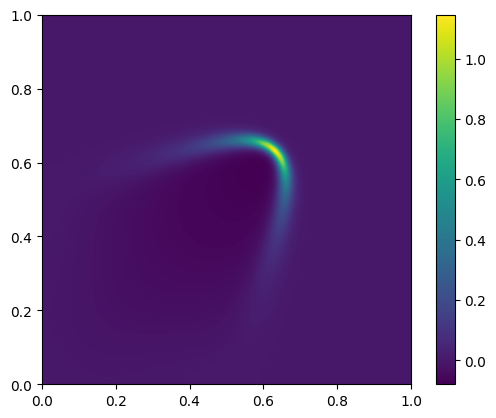

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = coords_x.tolist()
y = coords_y.tolist()
z = datas[999, N:].tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()

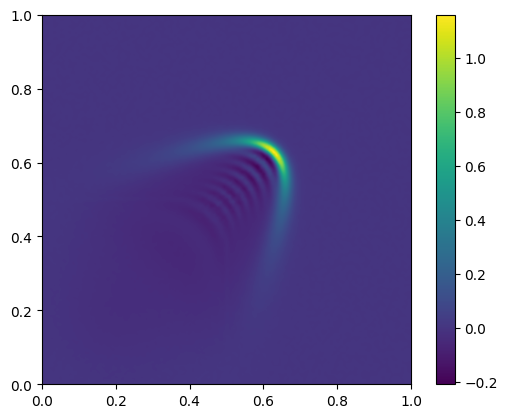

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = coords_x.tolist()
y = coords_y.tolist()
z = approximates[0].detach().cpu().tolist()

# target grid to interpolate to
xi = yi = np.linspace(0,1.0,1200)
xi,yi = np.meshgrid(xi,yi)

# set mask
# mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='cubic')

plt.imshow(zi,origin='lower', extent=[0,1,0,1])
plt.colorbar()

In [20]:
encoded = ed.nrbs.encode(datas[999, :N].to(device).to(device))

In [21]:
encoded.shape

torch.Size([20])

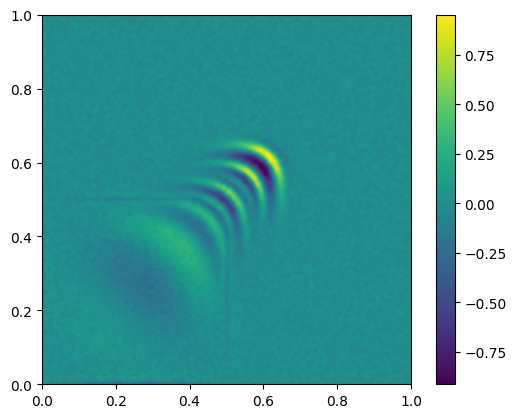

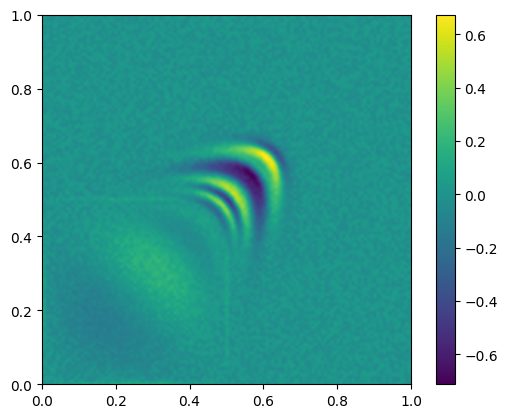

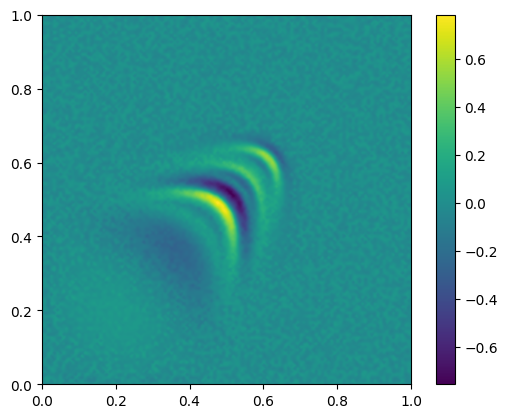

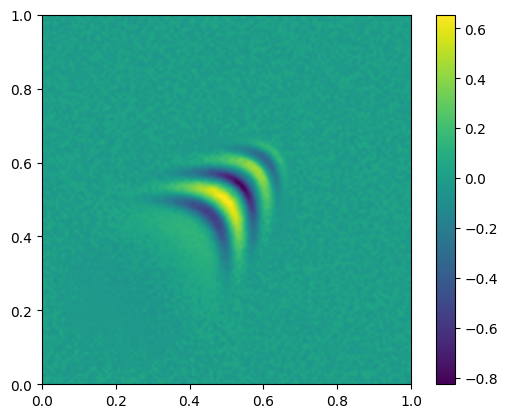

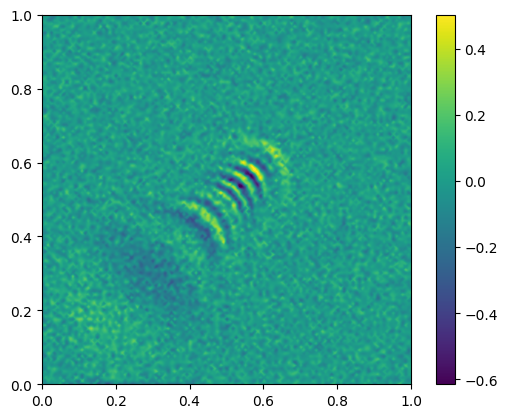

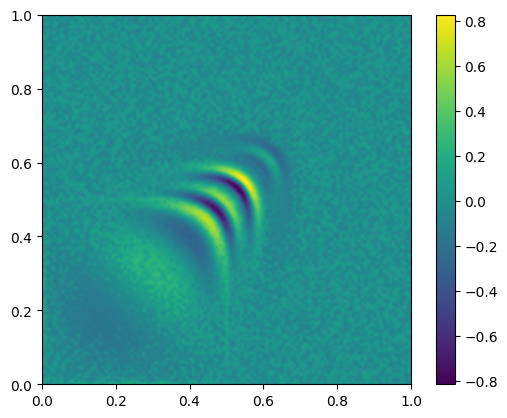

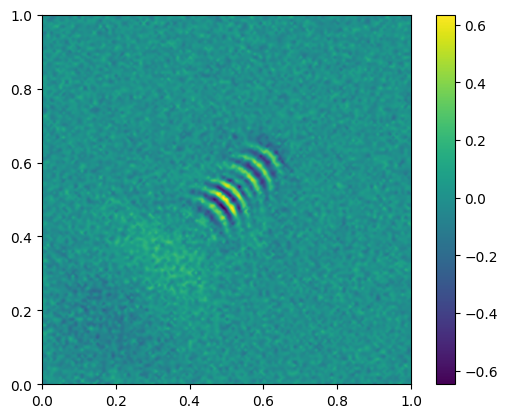

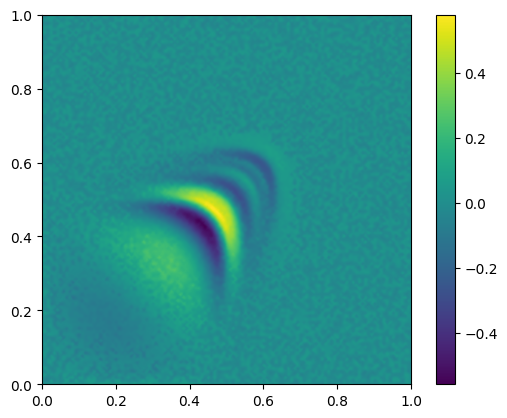

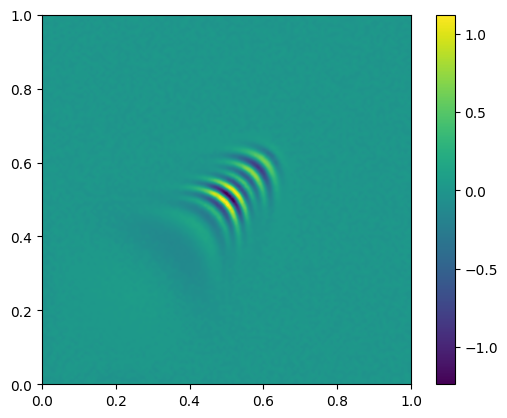

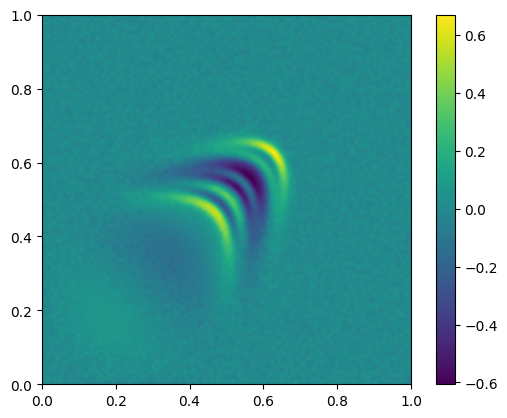

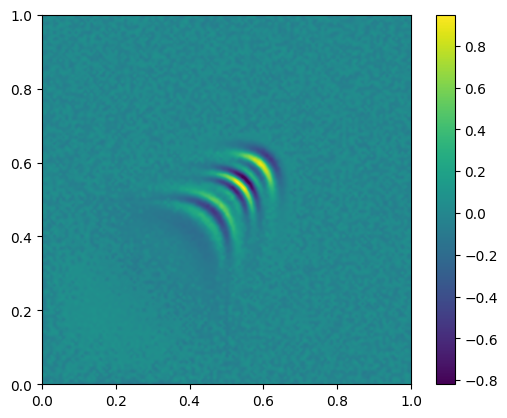

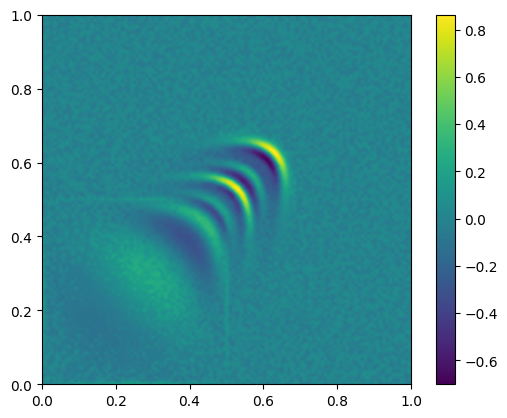

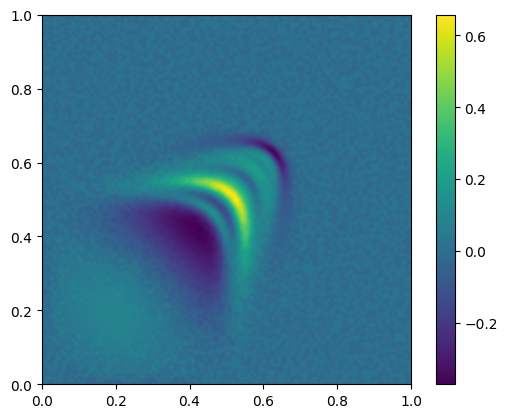

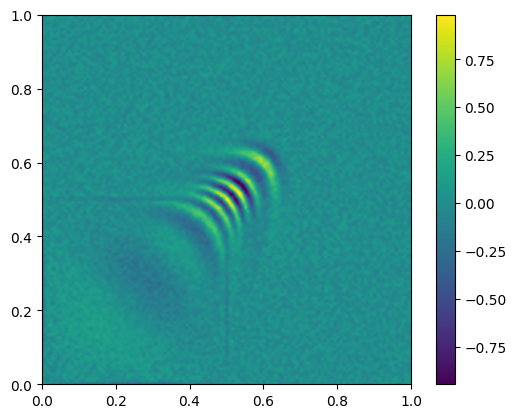

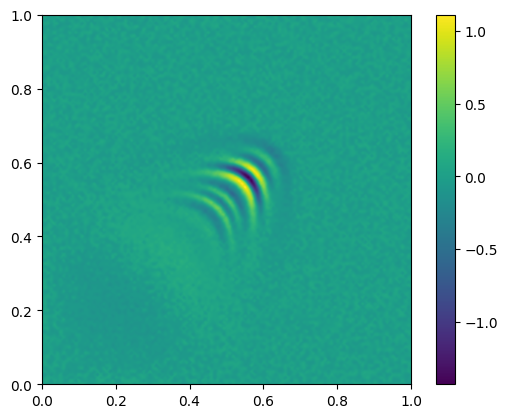

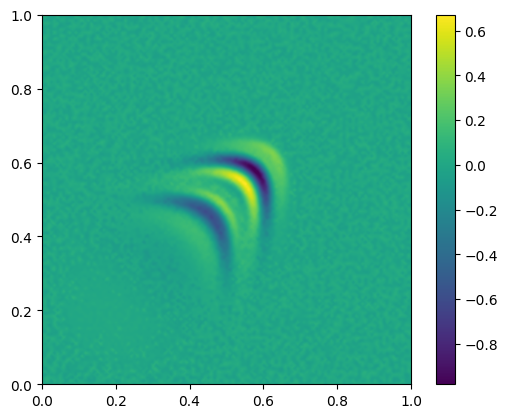

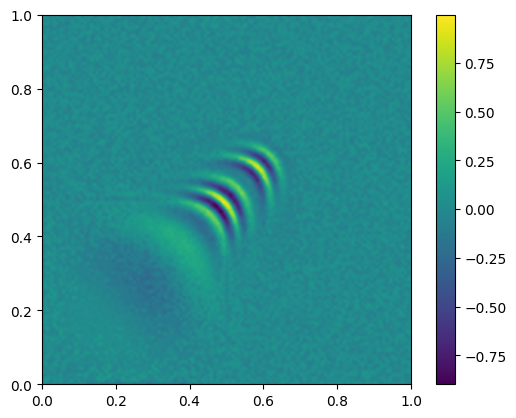

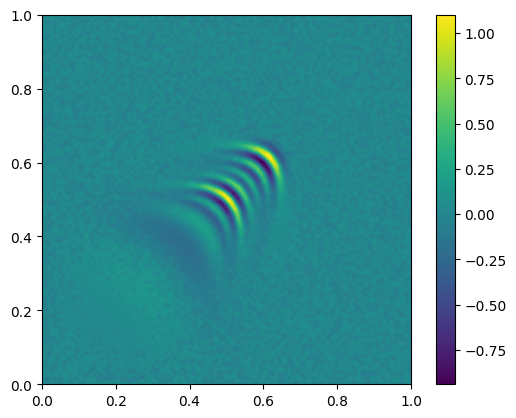

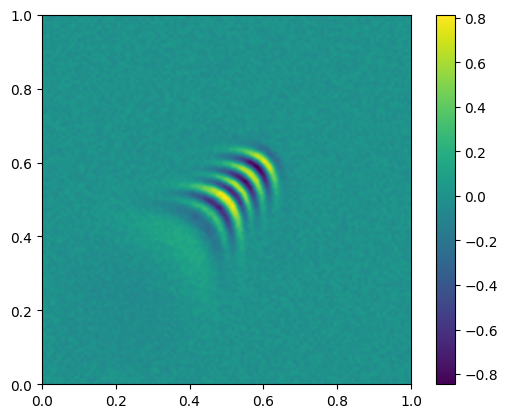

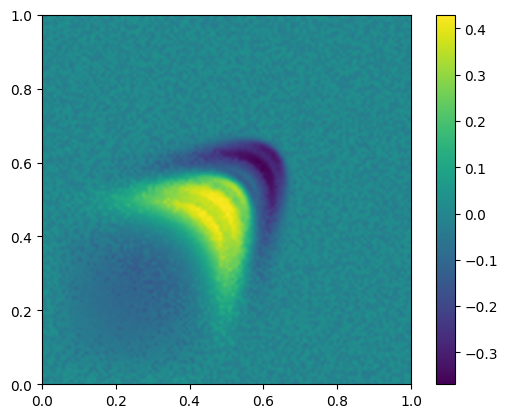

In [22]:
for basis_id in range(n):
    z = ed.nrbs.decoder.weight[:,basis_id].tolist()

    vmin = min(z)
    vmax = max(z)

    # target grid to interpolate to
    xi = yi = np.linspace(0,1.0,1200)
    xi,yi = np.meshgrid(xi,yi)

    # interpolate
    zi = griddata((x,y),z,(xi,yi),method='cubic')

    plt.imshow(zi,origin='lower', extent=[0,1,0,1],vmin=vmin,vmax=vmax)
    plt.colorbar()
    plt.show()
